# Model Evaluation

## Prediction
นำข้อมูล Test set เข้าทำนาย และได้ผลลัพธ์ y_pred (y_predict) 

Note: <b>สนใจ/Focus หาอะไร ให้สิ่งนั้นเป็น Positive</b>
- ระบบตรวจจับกำจัดเมล์ขยะ สนใจ (Focus หา) Spam : ให้ Spam = Positive 
- ระบบตรวจหาผู้ป่วย สนใจ (Focus หา) ผู้ป่วย : ให้ผล ป่วย = Positive 
- ระบบตรวจหาสินค้าดี : ให้ของดี = Positive

In [1]:
# create model ... สมมุติว่าส่วนนี้ทำการ Train สร้าง Model เรียบร้อยแล้ว
# model.fit(X, y)

# y_pred = model.predict(X_test) ทำการทำนาย (สมมุติว่าทำนายแล้วได้ดัง y_pred ด้านล่าง)

# ค่า Label และความหมาย  0=Bad, 1=Good
y_targets = ['Bad','Good']

y_true = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1]     # ค่า Label จริงของข้อมูล (y_test)
y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0]     # Label ที่ได้จากการทำนายของ Model (ผลการ Predict)

## Confusion Matrix

## Accuracy

In [2]:
# Accuracy = ที่ทำนายถูก/ทั้งหมด = (TP+TN) / All
(3+4)/10

0.7

## Precision
สนใจผลที่ทำนาย (Prediction) ว่ามีความถูกต้องแม่นยำเท่าใด

In [3]:
# Precision (Positive) = TP / (TP+FP)
Pp = 3/(3+2)
Pp

0.6

In [4]:
# Precision (Positive) = TP / (TP+FP)
# Precision (Negative) = TN / (TN+FN)
Pn = 4/(4+1)
Pn

0.8

## Recall
พิจารณาเทียบกับของจริง (Actual)

In [5]:
# Recall (Positive) = TP / (TP+FN)
Rp = 3/(3+1)
Rp

0.75

In [6]:
# Recall (Positive) = TP / (TP+FN)
# Recall (Negative) = TN / (TN+FP)
Rn = 4/(4+2)
Rn

0.6666666666666666

In [7]:
# F1 score = 2.Precision.Recall/(Precision + Recall)
# Positive
2 * Pp * Rp / (Pp + Rp)

0.6666666666666665

In [8]:
# F1 score = 2.Precision.Recall/(Precision + Recall)
# Negative
2 * Pn * Rn / (Pn + Rn)

0.7272727272727272

## Scikit-learn
ใช้ไลบรารี แสดงตาราง Confusion Matrix และ คำนวณค่าต่าง ๆ

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [10]:
# 0=Bad, 1=Good   แทนค่าด้วย 0 1 เพื่อให้ดูง่ายขึ้น (กำหนดเป็นอะไรก็ได้ตามที่ใช้งาน)
y_targets = ['Bad','Good']

print('Accuracy Score:', accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred, target_names=y_targets))

cm = confusion_matrix(y_true, y_pred)
print(cm)

Accuracy Score: 0.7
              precision    recall  f1-score   support

         Bad       0.80      0.67      0.73         6
        Good       0.60      0.75      0.67         4

    accuracy                           0.70        10
   macro avg       0.70      0.71      0.70        10
weighted avg       0.72      0.70      0.70        10

[[4 2]
 [1 3]]


In [11]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
TN, FP, FN, TP
# cm

(4, 2, 1, 3)

In [12]:
precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', accuracy)
print('Precision (Positive or Good):', precision_p)
print('Precision (Negative or Bad):', precision_n)
print('Recall (Positive or Good):', recall_p)
print('Recall (Negative or Bad):', recall_n.round(2))

Accuracy: 0.7
Precision (Positive or Good): 0.6
Precision (Negative or Bad): 0.8
Recall (Positive or Good): 0.75
Recall (Negative or Bad): 0.67


## Graphics

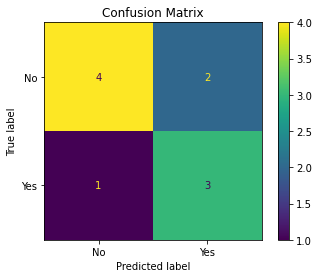

In [13]:
# scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_targets = ['Bad','Good']
# labels = ['Bad','Good']     #
labels = ['No','Yes']       # COVID-19

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('Confusion Matrix')
plt.show()

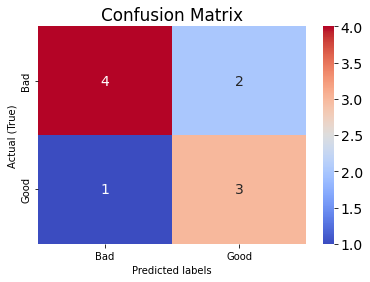

In [14]:
# Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5, 4  
plt.rcParams.update({'font.size':14})  

sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm") #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)

plt.show()

In [15]:
!conda list scikit-plot
# !pip show scikit-plot

# packages in environment at C:\Users\Asus\anaconda3:
#
# Name                    Version                   Build  Channel


In [16]:
!pip install scikit-plot
# !conda install -c conda-forge scikit-plot

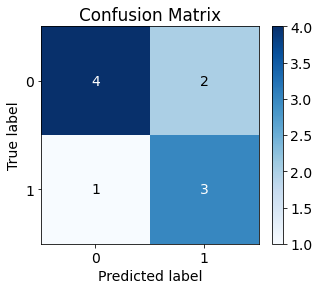

In [17]:
# Scikit-plot

import matplotlib.pyplot as plt
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_true, y_pred)
plt.show()

# 3 Class (Catgories)
Cat, Dog, Bird

In [18]:
# ws03

# create model ... สมมุติว่าส่วนนี้ทำการ Train สร้าง Model เรียบร้อยแล้ว
# model.fit(X, y)

# model.score(X, y) คำนวณค่าความแม่นยำ
# y_pred = model.predict(X_test) ทำการทำนาย (สมมุติว่าทำนายแล้วได้ดัง y_pred ด้านล่าง)


y_targets = ['Cat','Dog','Bird']

y_true = [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2]
y_pred = [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2]


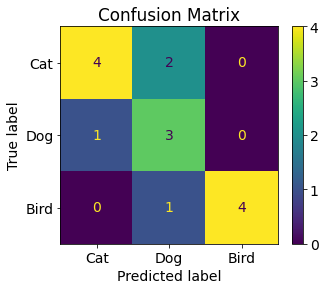

In [19]:
# scikit-learn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['Cat','Dog','Bird']       # 

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Confusion Matrix
print('Accuracy Score: {:.3f}'.format(accuracy_score(y_true, y_pred)))

print(classification_report(y_true, y_pred, target_names=y_targets))

cm = confusion_matrix(y_true, y_pred)
print(cm)

Accuracy Score: 0.733
              precision    recall  f1-score   support

         Cat       0.80      0.67      0.73         6
         Dog       0.50      0.75      0.60         4
        Bird       1.00      0.80      0.89         5

    accuracy                           0.73        15
   macro avg       0.77      0.74      0.74        15
weighted avg       0.79      0.73      0.75        15

[[4 2 0]
 [1 3 0]
 [0 1 4]]


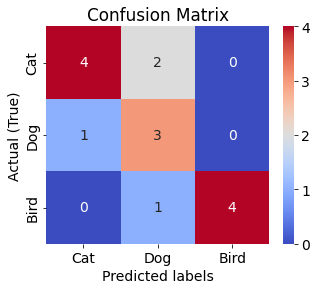

In [21]:
ax = plt.subplot()

plt.rcParams['figure.figsize'] = 5, 4 
plt.rcParams.update({'font.size':14}) 

sns.heatmap(cm, annot=True, ax = ax, cmap="coolwarm") #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y_targets)
ax.yaxis.set_ticklabels(y_targets)

plt.show()

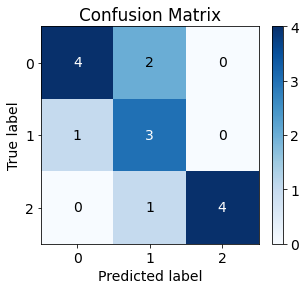

In [22]:
import scikitplot as skplot
skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
plt.show()

In [23]:
print('y_true: ', y_true)
print('y_pred: ', y_pred)

y_true:  [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2]
y_pred:  [0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2]
